In [26]:
#raise Exception("Expect more errors down the line! Fill the missing code to get to a df that looks like the one in readme.md")

## Imports and fetching data

In [27]:
import pandas as pd
import numpy as np
import re

In [28]:
df = pd.read_csv("titanic.csv")

## Exploring data

In [29]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Fixing age as Int

In [31]:
# chekcing NaN for age

ageNa = df["Age"].isna().sum()

print(f"Ammount of Nan Values in Age Series: {ageNa}")

Ammount of Nan Values in Age Series: 263


In [32]:
df["Age"].isna().sum()

263

In [33]:
# filling age na with -1
df["Age"] = df["Age"].fillna(-1)

# casting type
df["Age"] = df["Age"].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   int32  
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 107.5+ KB


In [35]:
# Checking that fillna worked
ageNa = df["Age"].isna().sum()

print(f"Ammount of Nan Values in Age Series after fillna: {ageNa}")

Ammount of Nan Values in Age Series after fillna: 0


# Feature engineering text data

In [36]:
# Casting to lowercase to make text easier to work with

df["Name"] = df["Name"].apply(lambda x: x.lower())

In [37]:
def title_extractor(name: str) -> str:
    match = re.search(" [a-z]*\.", name)

    title = match.group(0)

    title = title.strip(" ")

    out = re.sub("\.", "", title)
    
    return out

In [38]:
df["Name"]

0                                 braund, mr. owen harris
1       cumings, mrs. john bradley (florence briggs th...
2                                  heikkinen, miss. laina
3            futrelle, mrs. jacques heath (lily may peel)
4                                allen, mr. william henry
                              ...                        
1304                                   spector, mr. woolf
1305                         oliva y ocana, dona. fermina
1306                         saether, mr. simon sivertsen
1307                                  ware, mr. frederick
1308                             peter, master. michael j
Name: Name, Length: 1309, dtype: object

In [39]:
df["Title"] = df["Name"].apply(lambda x: title_extractor(x))

In [40]:
df["Title"]

0           mr
1          mrs
2         miss
3          mrs
4           mr
         ...  
1304        mr
1305      dona
1306        mr
1307        mr
1308    master
Name: Title, Length: 1309, dtype: object

In [41]:
df["Title"].value_counts()

mr          757
miss        260
mrs         197
master       61
rev           8
dr            8
col           4
mlle          2
major         2
ms            2
lady          1
sir           1
mme           1
don           1
capt          1
countess      1
jonkheer      1
dona          1
Name: Title, dtype: int64

## First Name extraction

In [42]:
def first_name_extractor(name: str) -> str:
    first_name = re.search(r"^[a-z]*\,", name)
    
    try:
        first_name = first_name.group(0)
        first_name = re.sub(r"\,", "", first_name)
    except:
        first_name = "Undefined"

    return first_name

In [43]:
def last_name_extractor(name: str) -> str:
    last_name = re.search(r"\. [a-z ]*", name)
    
    try:
        last_name = last_name.group(0)
        last_name = re.sub(r"^\. ", "", last_name)
    except:
        last_name = "Undefined"

    return last_name

In [44]:
df["Last Name"] = df["Name"].apply(lambda x: first_name_extractor(x))

In [45]:
df["First Name"] = df["Name"].apply(lambda x: last_name_extractor(x))

In [46]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Last Name,First Name
0,1,3,"braund, mr. owen harris",male,22,1,0,A/5 21171,7.2500,NaN,S,mr,braund,owen harris
1,2,1,"cumings, mrs. john bradley (florence briggs th...",female,38,1,0,PC 17599,71.2833,C85,C,mrs,cumings,john bradley
2,3,3,"heikkinen, miss. laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,miss,heikkinen,laina
3,4,1,"futrelle, mrs. jacques heath (lily may peel)",female,35,1,0,113803,53.1000,C123,S,mrs,futrelle,jacques heath
4,5,3,"allen, mr. william henry",male,35,0,0,373450,8.0500,NaN,S,mr,allen,william henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"spector, mr. woolf",male,-1,0,0,A.5. 3236,8.0500,NaN,S,mr,spector,woolf
1305,1306,1,"oliva y ocana, dona. fermina",female,39,0,0,PC 17758,108.9000,C105,C,dona,Undefined,fermina
1306,1307,3,"saether, mr. simon sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,mr,saether,simon sivertsen
1307,1308,3,"ware, mr. frederick",male,-1,0,0,359309,8.0500,NaN,S,mr,ware,frederick


# Making ordinal categories for age (usefull for classification later on)

In [47]:
def age_to_ordinal(age: int) -> int:

    if age < 0:
        return -1
    elif age < 26:
        return 1
    elif age < 51:
        return 2
    elif age < 76:
        return 3
    else:
        return 4

In [48]:
df["Age Category"] = df["Age"].apply(age_to_ordinal)

In [49]:
# Just looking at age categorie to see effect
df["Age Category"].value_counts()

 2    508
 1    443
-1    263
 3     93
 4      2
Name: Age Category, dtype: int64

<AxesSubplot:>

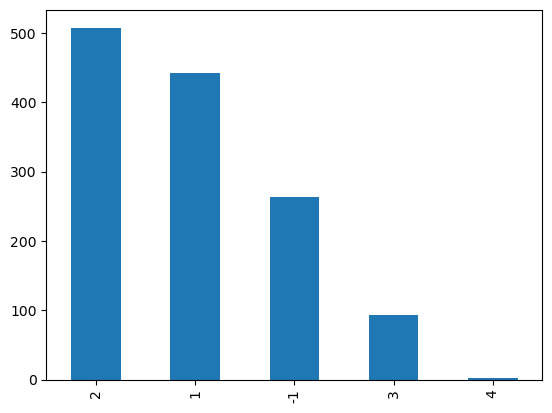

In [50]:
# Fancy bonus plot if you want to
df["Age Category"].value_counts().plot(kind="bar")

In [51]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Last Name,First Name,Age Category
0,1,3,"braund, mr. owen harris",male,22,1,0,A/5 21171,7.2500,NaN,S,mr,braund,owen harris,1
1,2,1,"cumings, mrs. john bradley (florence briggs th...",female,38,1,0,PC 17599,71.2833,C85,C,mrs,cumings,john bradley,2
2,3,3,"heikkinen, miss. laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,miss,heikkinen,laina,2
3,4,1,"futrelle, mrs. jacques heath (lily may peel)",female,35,1,0,113803,53.1000,C123,S,mrs,futrelle,jacques heath,2
4,5,3,"allen, mr. william henry",male,35,0,0,373450,8.0500,NaN,S,mr,allen,william henry,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"spector, mr. woolf",male,-1,0,0,A.5. 3236,8.0500,NaN,S,mr,spector,woolf,-1
1305,1306,1,"oliva y ocana, dona. fermina",female,39,0,0,PC 17758,108.9000,C105,C,dona,Undefined,fermina,2
1306,1307,3,"saether, mr. simon sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,mr,saether,simon sivertsen,2
1307,1308,3,"ware, mr. frederick",male,-1,0,0,359309,8.0500,NaN,S,mr,ware,frederick,-1


## Dealing with rest of NaN
Since ish 80% of cabin is nan, it is doesn't make sense to drop it, thusly just filling rest of dataframe with Undefined for NaN values, however do not do this to deal with NaN in numerical columns (Series in panda language) as this would change the datatype (then you could use -1 instead as shown above)

In [52]:
df.isna().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
Title              0
Last Name          0
First Name         0
Age Category       0
dtype: int64

In [53]:
# Filling Fare NaN float value of -1.0
df["Fare"] = df["Fare"].fillna(-1.0)

# Filling NaN in the two remaining string columngs (thought this hits entire df)
df = df.fillna("Undefined")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Pclass        1309 non-null   int64  
 2   Name          1309 non-null   object 
 3   Sex           1309 non-null   object 
 4   Age           1309 non-null   int32  
 5   SibSp         1309 non-null   int64  
 6   Parch         1309 non-null   int64  
 7   Ticket        1309 non-null   object 
 8   Fare          1309 non-null   float64
 9   Cabin         1309 non-null   object 
 10  Embarked      1309 non-null   object 
 11  Title         1309 non-null   object 
 12  Last Name     1309 non-null   object 
 13  First Name    1309 non-null   object 
 14  Age Category  1309 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(8)
memory usage: 148.4+ KB


In [55]:
df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Title           0
Last Name       0
First Name      0
Age Category    0
dtype: int64

In [56]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Last Name,First Name,Age Category
0,1,3,"braund, mr. owen harris",male,22,1,0,A/5 21171,7.2500,Undefined,S,mr,braund,owen harris,1
1,2,1,"cumings, mrs. john bradley (florence briggs th...",female,38,1,0,PC 17599,71.2833,C85,C,mrs,cumings,john bradley,2
2,3,3,"heikkinen, miss. laina",female,26,0,0,STON/O2. 3101282,7.9250,Undefined,S,miss,heikkinen,laina,2
3,4,1,"futrelle, mrs. jacques heath (lily may peel)",female,35,1,0,113803,53.1000,C123,S,mrs,futrelle,jacques heath,2
4,5,3,"allen, mr. william henry",male,35,0,0,373450,8.0500,Undefined,S,mr,allen,william henry,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"spector, mr. woolf",male,-1,0,0,A.5. 3236,8.0500,Undefined,S,mr,spector,woolf,-1
1305,1306,1,"oliva y ocana, dona. fermina",female,39,0,0,PC 17758,108.9000,C105,C,dona,Undefined,fermina,2
1306,1307,3,"saether, mr. simon sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,Undefined,S,mr,saether,simon sivertsen,2
1307,1308,3,"ware, mr. frederick",male,-1,0,0,359309,8.0500,Undefined,S,mr,ware,frederick,-1
